In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Get the data**

In [ ]:
adm = pd.read_csv('Admission_Predict.csv')
adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Data Preprocessing**

In [ ]:
adm.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Exploratory Data Analysis**

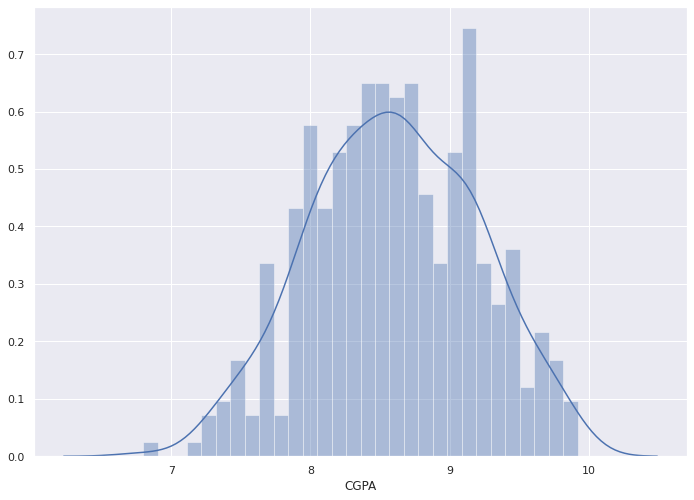

In [ ]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.distplot(adm['CGPA'], bins=30)
plt.show()

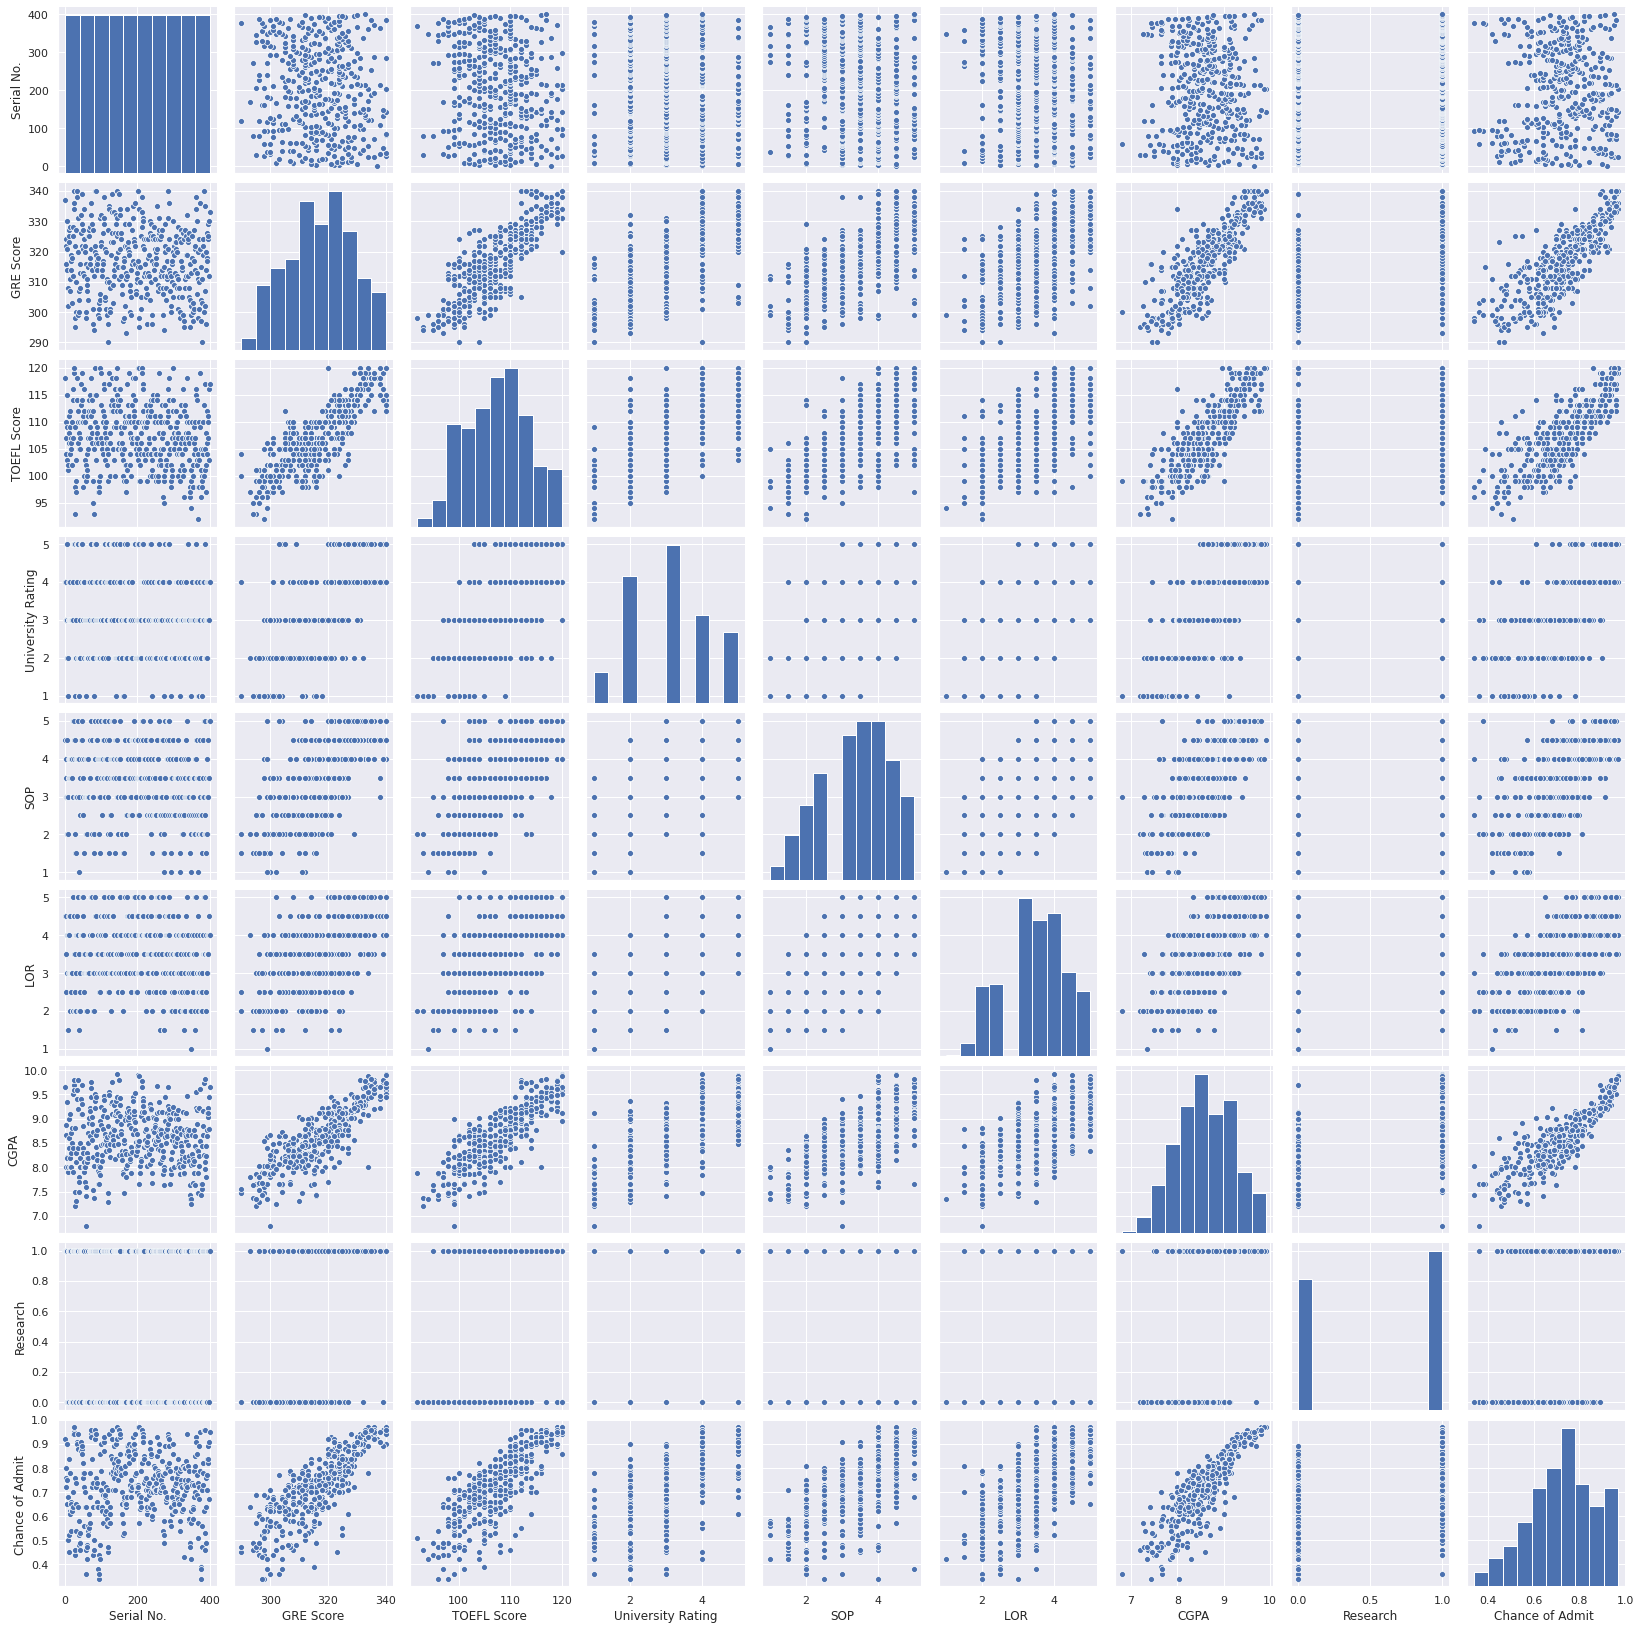

In [ ]:
sns.pairplot(adm)

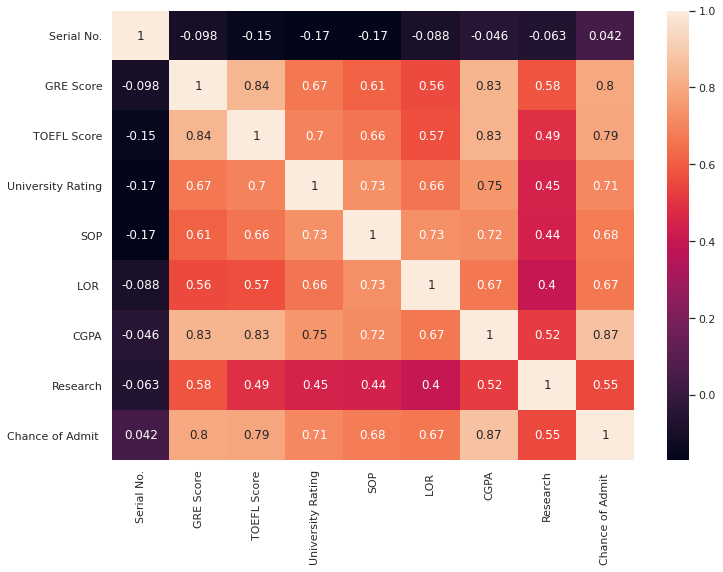

In [ ]:
sns.heatmap(adm.corr(), annot=True)

Text(0, 0.5, 'Chance of Admit')

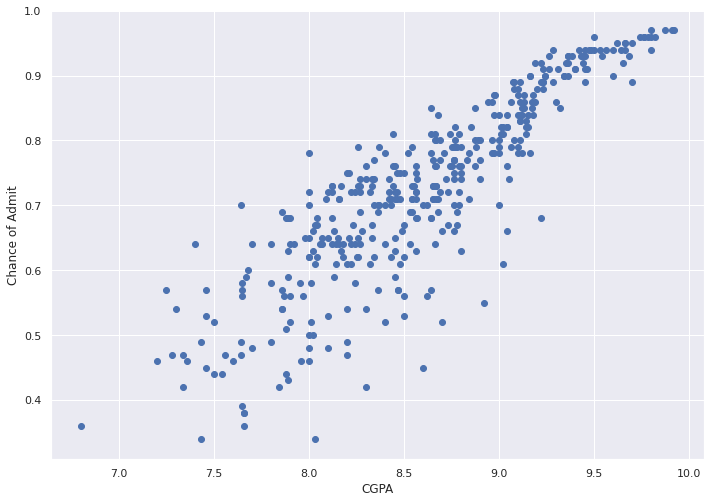

In [ ]:
X = adm['CGPA'].values.reshape(-1,1)
Y = adm['Chance of Admit '].values.reshape(-1,1)
plt.scatter(X, Y, marker='o')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

In [ ]:
from sklearn.model_selection import train_test_split
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape) 

(400, 1)
(320, 1)
(80, 1)
(320, 1)
(80, 1)


**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# To retrieve the intercept (theta0)
print(lin_model.intercept_)

# To retrieve the slope (theta1)
print(lin_model.coef_)

[-1.12312401]
[[0.21455941]]


**Predicting test data**

In [ ]:
y_pred = lin_model.predict(X_test)
#print(y_pred)
print(y_pred.flatten())


[0.80147391 0.8036195  0.4774892  0.6577191  0.43243172 0.76285321
 0.70492217 0.56331296 0.64055435 0.67059267 0.70706777 0.4774892
 0.59335128 0.83151223 0.8422402  0.83365782 0.7328149  0.70921336
 0.6233896  0.73710608 0.61909841 0.94093752 0.75641643 0.56974974
 0.83365782 0.82936663 0.81649307 0.59335128 0.74997965 0.81220188
 0.70921336 0.90017124 0.69204861 0.63626316 0.71350455 0.71350455
 0.77358118 0.90875361 0.59764247 0.67917504 0.68990301 0.95810228
 0.95381109 0.7306693  0.57618653 0.75641643 0.97097584 0.88515208
 0.60193366 0.80791069 0.67917504 0.61480722 0.74139727 0.60193366
 0.67059267 0.78216356 0.76285321 0.56974974 0.78645475 0.84653138
 0.59549687 0.82936663 0.94737431 0.61480722 0.73496049 0.5869145
 0.61909841 0.71350455 0.64484554 0.7328149  0.85940495 0.88086089
 0.52898346 0.90446242 0.76499881 0.66201029 0.8400946  0.90660802
 0.62553519 0.77572678]


In [ ]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.84,0.801474
1,0.87,0.803620
2,0.45,0.477489
3,0.76,0.657719
4,0.57,0.432432
...,...,...
75,0.72,0.662010
76,0.84,0.840095
77,0.91,0.906608
78,0.65,0.625535


<function matplotlib.pyplot.show>

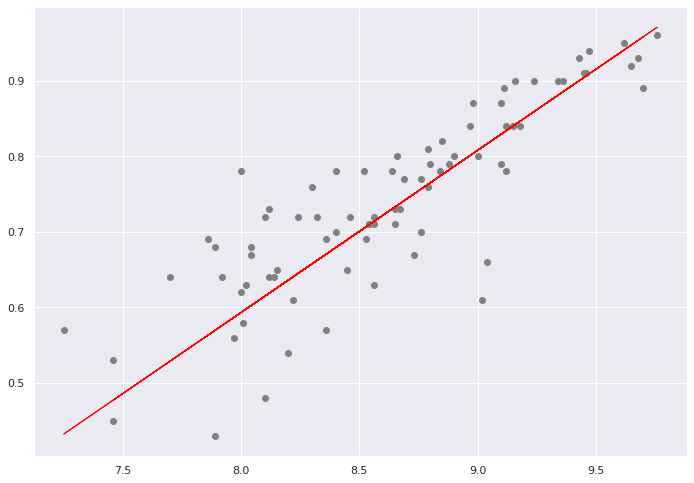

In [ ]:
plt.scatter(X_test, Y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 1)
plt.show

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
accuracy = lin_model.score(X_test, Y_test)
print(accuracy)

Mean Absolute Error:  0.0495774380267458
Mean Squared Error:  0.004515983608418236
Root Mean Squared Error:  0.0672010685065218
0.6923192908589177
